
#빅데이터 군집분석

---



1. 빅데이터 비지도 학습

비지도학습: 레이블 데이터 없는 것

>군집화: 구체적인 특징을 공유하는 군집 찾는 것 ex) k-평균 알고리즘(군집 중심으로부터 각 점까지 거리 최소화)

>차원 축소: 데이터 세트의 특징 행렬 간결하게 표현 ex) 나선형 2차원 이으면 1차원 -> 데이터 구조 본질적으로 변화 x

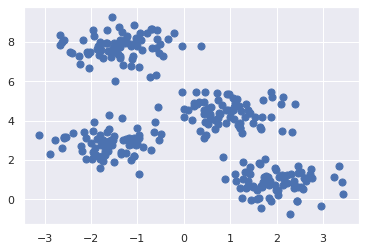

In [7]:
# k-평균 군집 분석

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples=300, centers = 4, cluster_std = 0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

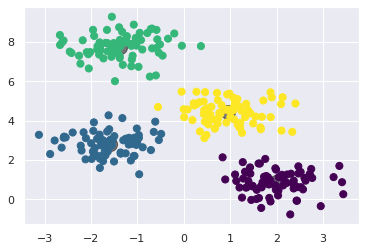

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4) # 중심점 개수
kmeans.fit(X) # 모델 적합
y_kmeans = kmeans.predict(X) # 모델 적용

# 군집 중심 시각화
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',alpha=0.5,s=200)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis')

[[0.972 0.    0.002 0.026]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.999 0.    0.    0.001]]


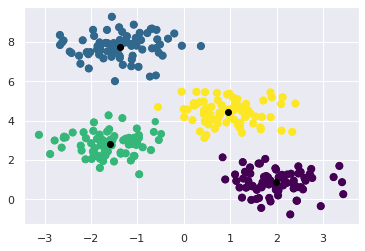

In [14]:
# 가우스 혼합 모델 : 각 점과 모든 군집 거리 비교, 타원형 군집 경계
# k-평균 군집 분석은 경계에 있는 점의 불확실성 고려 안함, 원형 경계 사용하여 유연성 부족

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4).fit(X)
labels= gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

# 확률적 군집 할당
probs = gmm.predict_proba(X)
print(probs[:5].round(3)) # k-평균은 0 or 1

size = 50*probs.max(1)**2
plt.scatter(X[:,0],X[:,1],c=labels,s=size,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black')

# 타원형의 군집 할당도 가능